<a href="https://colab.research.google.com/github/JakubWalczykowski/notebooks/blob/main/macierz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from collections import defaultdict
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2001_to_2004.csv',
                      usecols=["Date", "Latitude", "Longitude"]).dropna()
df

<ipython-input-2-db6eb1542bd6>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2001_to_2004.csv',


,Date,Latitude,Longitude
1,03/01/2003 12:00:00 AM,41.817229,-87.637328
4,05/01/2003 01:00:00 AM,41.691785,-87.635116
6,01/01/2001 11:00:00 AM,41.68702,-87.608445
7,03/15/2003 12:00:00 AM,41.729712,-87.653159
9,01/01/2003 12:00:00 AM,41.869772,-87.70818
...,...,...,...
1923511,04/01/2001 09:00:00 AM,41.922997,-87.757492
1923512,09/01/2003 12:01:00 AM,41.963134,-87.784457
1923513,08/01/2002 09:00:00 AM,41.743865,-87.674464
1923514,06/04/2001 12:01:00 AM,41.736343,-87.555413


In [3]:
def stats(data):

    maxx = []
    minn = []
    for i in data.columns:
        maxx.append(data[i].value_counts().max())
        minn.append(data[i].value_counts().min())

    return pd.DataFrame(
        {'nunique': data.nunique(),
         'len': len(data),

         'types':data.dtypes,
         'Nulls' : data.isna().sum(),
                 # 'nunique/len': data.nunique()/len(data),
        # 'Nullpercent' : data.isna().sum()/len(data),
         "Value counts Max": maxx,
         'Value counts Min':minn
        },
        columns = ['nunique', 'len','types','Nulls'#,'Nullpercent', 'nunique/len'
                   ,"Value counts Max",'Value counts Min']).\
        sort_values(by ='nunique',ascending = False)



def countPlot(col,num = 6,hue = None):
    sns.set(rc={'figure.figsize':(6,6)})
    ax = sns.countplot(x=col, data=train_df, hue = hue,
                   order=train_df[col].value_counts().iloc[:num].index)

    return plt.show()

In [4]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

#df['Month'] = df['Date'].dt.to_period('M')
df['Month_Count'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month
df

,Date,Latitude,Longitude,Month_Count
1,2003-03-01 00:00:00,41.817229,-87.637328,27.0
4,2003-05-01 01:00:00,41.691785,-87.635116,29.0
6,2001-01-01 11:00:00,41.687020,-87.608445,1.0
7,2003-03-15 00:00:00,41.729712,-87.653159,27.0
9,2003-01-01 00:00:00,41.869772,-87.708180,25.0
...,...,...,...,...
1923511,2001-04-01 09:00:00,41.922997,-87.757492,4.0
1923512,2003-09-01 00:01:00,41.963134,-87.784457,33.0
1923513,2002-08-01 09:00:00,41.743865,-87.674464,20.0
1923514,2001-06-04 00:01:00,41.736343,-87.555413,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892824 entries, 1 to 1923515
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date         datetime64[ns]
 1   Latitude     float64       
 2   Longitude    float64       
 3   Month_Count  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 72.2 MB


In [6]:
df = df[df['Latitude'] > df['Latitude'].mean() - 7 * df['Latitude'].std()]\
                [df['Latitude'] < df['Latitude'].mean() + 7 * df['Latitude'].std()]
df = df[df['Longitude'] > df['Longitude'].mean() - 7 * df['Longitude'].std()]\
                [df['Longitude'] < df['Longitude'].mean() + 7 * df['Longitude'].std()]

<ipython-input-6-d770ab11785c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Latitude'] > df['Latitude'].mean() - 7 * df['Latitude'].std()]\


In [7]:
df[['Latitude', 'Longitude']]=df[['Latitude', 'Longitude']].round(3)
df["Month_Count"] = df["Month_Count"].fillna(0).astype("int8")
# df["Latitude"] = df["Latitude"].astype("float16")
# df["Longitude"] = df["Longitude"].astype("float16")
df

,Date,Latitude,Longitude,Month_Count
1,2003-03-01 00:00:00,41.817,-87.637,27
4,2003-05-01 01:00:00,41.692,-87.635,29
6,2001-01-01 11:00:00,41.687,-87.608,1
7,2003-03-15 00:00:00,41.730,-87.653,27
9,2003-01-01 00:00:00,41.870,-87.708,25
...,...,...,...,...
1923511,2001-04-01 09:00:00,41.923,-87.757,4
1923512,2003-09-01 00:01:00,41.963,-87.784,33
1923513,2002-08-01 09:00:00,41.744,-87.674,20
1923514,2001-06-04 00:01:00,41.736,-87.555,6


In [8]:
stats(df)

,nunique,len,types,Nulls,Value counts Max,Value counts Min
Date,731248,1892815,datetime64[ns],0,211,1
Latitude,379,1892815,float64,0,17689,77
Longitude,343,1892815,float64,0,27740,1
Month_Count,48,1892815,int8,0,74539,3872


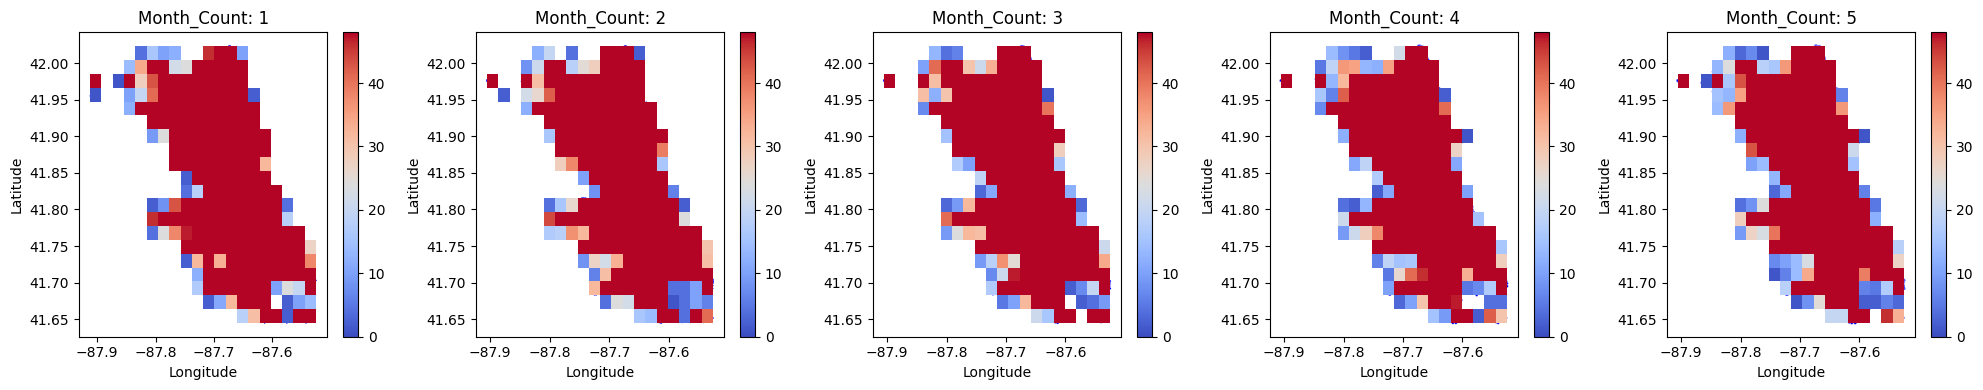

In [9]:
unique_month_counts = df['Month_Count'].unique()
unique_month_counts.sort()
unique_month_counts = unique_month_counts[:5]
#unique_month_counts = np.arange(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))


palette = sns.color_palette("coolwarm", as_cmap=True)

max_count = df['Month_Count'].max()
color_scale_upper_limit = max_count # + 1500 # Adjust this value based on your data

for i, month_count in enumerate(unique_month_counts):
    ax = axes[i]

    filtered_data = df[df['Month_Count'] == month_count]

    # Create scatter plot
    sns.scatterplot(data=filtered_data, x='Longitude', y='Latitude', ax=ax, s=filtered_data['Month_Count'], color='blue')

    # Create heatmap using histplot with the diverging color palette
    sns.histplot(data=filtered_data, x='Longitude', y='Latitude', bins=20, cbar=True, ax=ax, cmap=palette, vmin=0, vmax=color_scale_upper_limit)

    ax.set_title(f"Month_Count: {month_count}")

plt.tight_layout()
plt.show()

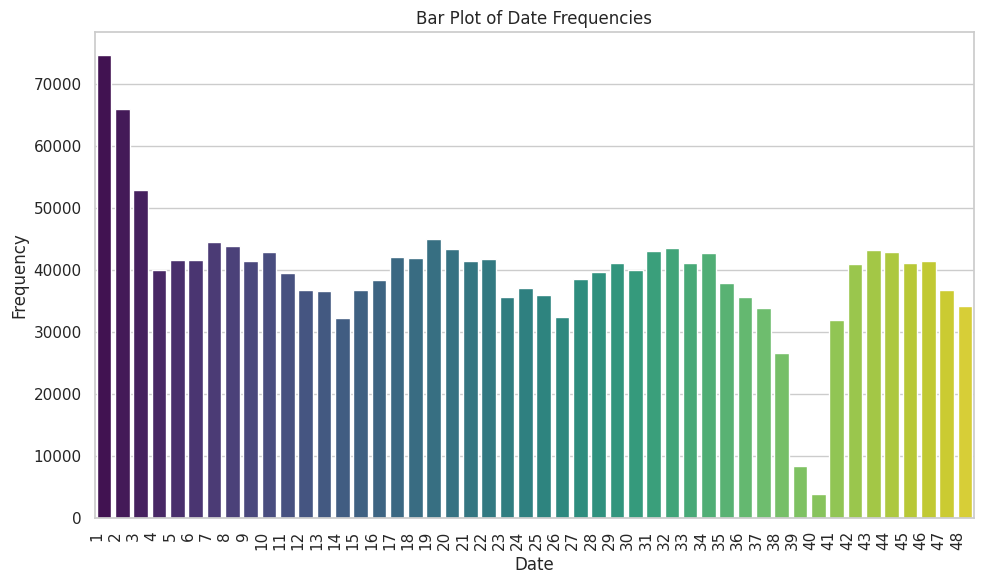

In [10]:
df_sorted = df.sort_values(by='Month_Count')
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.countplot(data=df_sorted, x='Month_Count', palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Bar Plot of Date Frequencies')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Longitude_col = df['Longitude'].nunique()
# Latitude_col = df['Latitude'].nunique()
# Month_col = df['Month_Count'].nunique()

# # Create a mapping between distinct values and indices for each column
# unique_longitudes = sorted(df['Longitude'].unique())
# unique_latitudes = sorted(df['Latitude'].unique())
# unique_month_counts = sorted(df['Month_Count'].unique())

# value_to_index_Longitude_col = {value: index for index, value in enumerate(unique_longitudes)}
# value_to_index_Latitude_col = {value: index for index, value in enumerate(unique_latitudes)}
# value_to_index_Month_col = {value: index for index, value in enumerate(unique_month_counts)}

# # Create a 3D NumPy matrix to store the counts
# matrix_shape = (Latitude_col, Longitude_col, Month_col)

# count_matrix = np.zeros(matrix_shape, dtype=int)

# # Iterate through each row and update counts using the mapped indices
# for _, row in df.iterrows():
#     idx_Latitude_col = value_to_index_Latitude_col[row['Latitude']]
#     idx_Longitude_col = value_to_index_Longitude_col[row['Longitude']]
#     idx_Month_col = value_to_index_Month_col[row['Month_Count']]

#     # Update the count_matrix using the obtained indices
#     count_matrix[idx_Latitude_col, idx_Longitude_col, idx_Month_col] += 1

# #print(count_matrix)
# #count_matrix.shape
# #max_value = np.max(count_matrix)
# #max_value

In [12]:
# print(count_matrix)
# count_matrix.shape
# max_value = np.max(count_matrix)
# max_value

In [13]:
Longitude_col = df['Longitude'].nunique()
Latitude_col = df['Latitude'].nunique()
Month_col = df['Month_Count'].nunique()

# Create a mapping between distinct values and indices for each column
unique_longitudes = sorted(df['Longitude'].unique())
unique_latitudes = sorted(df['Latitude'].unique())
unique_month_counts = sorted(df['Month_Count'].unique())

value_to_index_Longitude_col = {value: index + 1 for index, value in enumerate(unique_longitudes)}
value_to_index_Latitude_col = {value: index + 1 for index, value in enumerate(unique_latitudes)}
value_to_index_Month_col = {value: index + 1 for index, value in enumerate(unique_month_counts)}

# Create a 3D NumPy matrix to store the counts
matrix_shape = (Latitude_col, Longitude_col, Month_col)

count_matrix = np.zeros(matrix_shape, dtype=int)

# Iterate through each row and update counts using the mapped indices
for _, row in df.iterrows():
    idx_Latitude_col = value_to_index_Latitude_col[row['Latitude']]
    idx_Longitude_col = value_to_index_Longitude_col[row['Longitude']]
    idx_Month_col = value_to_index_Month_col[row['Month_Count']]

    # Update the count_matrix using the obtained indices
    count_matrix[idx_Latitude_col - 1, idx_Longitude_col - 1, idx_Month_col - 1] += 1

#print(count_matrix)
count_matrix.shape
max_value = np.max(count_matrix)
max_value

361

In [14]:
# chunk_size = 1  # Set the desired chunk size
# for i in range(0, len(count_matrix), chunk_size):
#     print(count_matrix[i:i+chunk_size])

In [15]:
total_sum = np.sum(count_matrix)

print("Sum of all values in the matrix:", total_sum)

Sum of all values in the matrix: 1892815


In [16]:
selected_values = count_matrix[:, :, 0]  # Assuming 1 is the index of the desired value

# Calculate the sum of selected values
sum_selected_values = np.sum(selected_values)

print("Sum of values with axis 2 value 1:", sum_selected_values)

Sum of values with axis 2 value 1: 74539


In [17]:
# rows = []
# for lat_idx, lat_value in enumerate(unique_latitudes):
#     for lon_idx, lon_value in enumerate(unique_longitudes):
#         for month_idx, month_value in enumerate(unique_month_counts):
#             count = count_matrix[lat_idx, lon_idx, month_idx]
#             if count > 0:
#                 rows.append({'Latitude': lat_value, 'Longitude': lon_value, 'Month_Count': month_value, 'Count': count})

# # Create a new DataFrame
# reversed_df = pd.DataFrame(rows)

# reversed_df

In [18]:
# stats(reversed_df)

In [19]:
# df_sorted = reversed_df.sort_values(by='Month_Count')
# sns.set(style="whitegrid")

# # Set the size of the plot
# plt.figure(figsize=(10, 6))

# # Create the bar plot
# sns.countplot(data=df_sorted, x='Month_Count', palette='viridis')

# # Rotate x-axis labels for better visibility
# plt.xticks(rotation=90, ha='right')

# # Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Frequency')
# plt.title('Bar Plot of Date Frequencies')

# # Show the plot
# plt.tight_layout()
# #plt.show()

In [20]:
# unique_month_counts = reversed_df['Month_Count'].unique()
# unique_month_counts.sort()
# unique_month_counts = unique_month_counts[:5]
# #unique_month_counts = np.arange(5)

# fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# # Determine the color palette
# palette = sns.color_palette("coolwarm", as_cmap=True)

# # Calculate a reasonable upper limit for color scale
# max_count = reversed_df['Month_Count'].max()
# color_scale_upper_limit = max_count + 2000  # Adjust this value based on your data

# for i, month_count in enumerate(unique_month_counts):
#     ax = axes[i]

#     filtered_data = reversed_df[reversed_df['Month_Count'] == month_count]

#     # Create scatter plot
#     sns.scatterplot(data=filtered_data, x='Longitude', y='Latitude', ax=ax, s=filtered_data['Month_Count'], color='blue')

#     # Create heatmap using histplot with the diverging color palette
#     sns.histplot(data=filtered_data, x='Longitude', y='Latitude', bins=20, cbar=True, ax=ax, cmap=palette, vmin=0, vmax=color_scale_upper_limit)

#     ax.set_title(f"Month_Count: {month_count}")

# plt.tight_layout()
# plt.show()

In [21]:
series = pd.Series(unique_month_counts)

num_unique = series.nunique()
print(num_unique)

48


In [22]:
# unique_month_counts = np.arange(5)  # Assuming you want to select the first 5 months
# #unique_month_counts = unique_month_counts[:5]
# fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# # Determine the color palette
# palette = sns.color_palette("coolwarm", as_cmap=True)

# # Calculate a reasonable upper limit for color scale
# max_count = np.max(count_matrix[:, :, unique_month_counts])
# color_scale_upper_limit = max_count + 2000  # Adjust this value based on your data

# for i, month_count in enumerate(unique_month_counts):
#     ax = axes[i]

#     # Select the data for the specific month count
#     filtered_data = count_matrix[:, :, month_count]

#     # Create scatter plot for the first two axes
#     x, y = np.meshgrid(np.arange(filtered_data.shape[1]), np.arange(filtered_data.shape[0]))
#     x = x.flatten()
#     y = y.flatten()
#     s = filtered_data.flatten()  # Use values as scatter point sizes
#     sns.scatterplot(x=x, y=y, s=s, color='blue', ax=ax)

#     # Create heatmap-like representation using histplot with the diverging color palette
#     sns.histplot(x=x, y=y, weights=s, bins=20, cbar=True, ax=ax, cmap=palette, vmin=0, vmax=color_scale_upper_limit)

#     ax.set_title(f"Month_Count: {month_count + 1}")

# plt.tight_layout()
# plt.show()



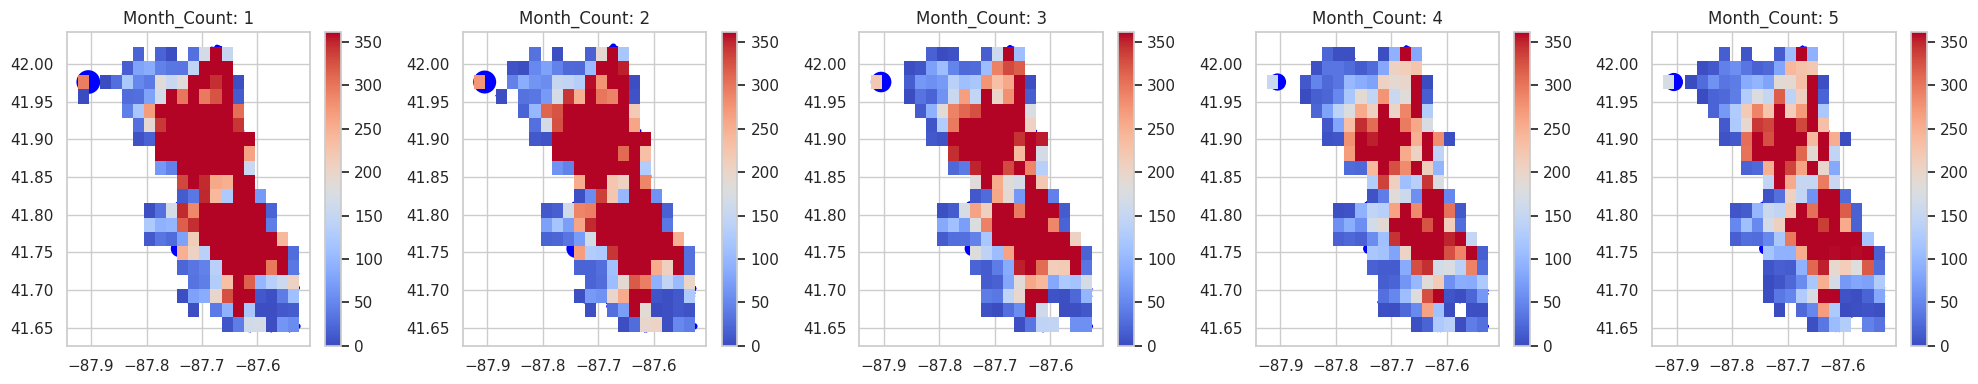

In [23]:
unique_month_counts = np.arange(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Determine the color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Calculate a reasonable upper limit for color scale
max_count = np.max(count_matrix)
color_scale_upper_limit = max_count # Adjust this value based on your data

for i, month_count in enumerate(unique_month_counts):
    ax = axes[i]

    # Select the data for the specific month count
    filtered_data = count_matrix[:, :, month_count]

    # Get the corresponding longitude and latitude values
    unique_longitudes = sorted(df['Longitude'].unique())
    unique_latitudes = sorted(df['Latitude'].unique())

    # Create scatter plot for the first two axes
    x, y = np.meshgrid(unique_longitudes, unique_latitudes)
    x = x.flatten()
    y = y.flatten()
    s = filtered_data.flatten()  # Use values as scatter point sizes
    sns.scatterplot(x=x, y=y, s=s, color='blue', ax=ax)

    # Create heatmap-like representation using histplot with the diverging color palette
    sns.histplot(x=x, y=y, weights=s, bins=20, cbar=True, ax=ax, cmap=palette, vmin=0, vmax=color_scale_upper_limit)

    ax.set_title(f"Month_Count: {month_count + 1}")

plt.tight_layout()
plt.show()

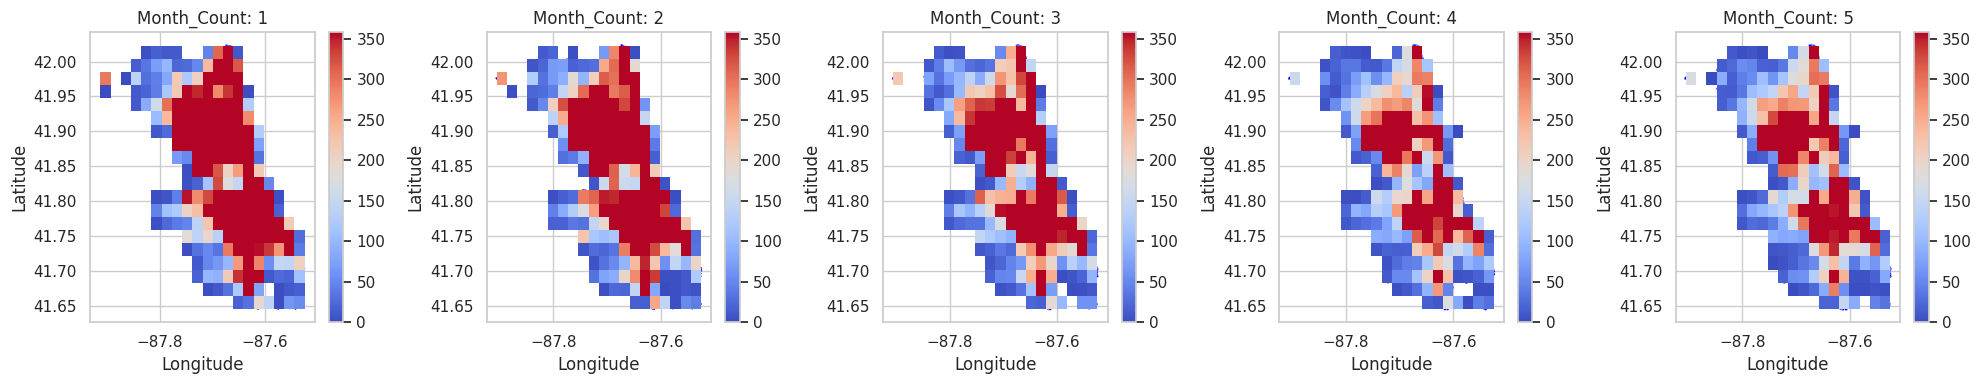

In [24]:
unique_month_counts = df['Month_Count'].unique()
unique_month_counts.sort()
unique_month_counts = unique_month_counts[:5]
#unique_month_counts = np.arange(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Determine the color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Calculate a reasonable upper limit for color scale
max_count = df['Month_Count'].max()
color_scale_upper_limit = max_count +310 # Adjust this value based on your data

for i, month_count in enumerate(unique_month_counts):
    ax = axes[i]

    filtered_data = df[df['Month_Count'] == month_count]

    # Create scatter plot
    sns.scatterplot(data=filtered_data, x='Longitude', y='Latitude', ax=ax, s=filtered_data['Month_Count'], color='blue')

    # Create heatmap using histplot with the diverging color palette
    sns.histplot(data=filtered_data, x='Longitude', y='Latitude', bins=20, cbar=True, ax=ax, cmap=palette, vmin=0, vmax=color_scale_upper_limit)

    ax.set_title(f"Month_Count: {month_count}")

plt.tight_layout()
plt.show()

In [25]:
# for i in range(num_plots):
#     ax = axes[i]

#     # Print the heatmap data for troubleshooting
#     print(f"Heatmap for Month_Count Value {i+1}:\n", count_matrix[:, :, i])

#     heatmap = count_matrix[:, :, i]
#     cax = ax.matshow(heatmap, cmap='YlOrRd', vmin=0, vmax=max_count)
#     ax.set_title(f'Column 3 Value {i+1}')
#     ax.set_xlabel('Column 2')
#     ax.set_ylabel('Column 1')
#     fig.colorbar(cax, ax=ax)

# plt.tight_layout()
# plt.show()

In [26]:
# # from sklearn.model_selection import train_test_split

# # Assuming you've already created and populated the count_matrix

# # Perform train-test split on the third axis
# X_train = count_matrix[:, :, :-5]  # All values except the last 5
# X_test = count_matrix[:, :, -5:]   # Last 5 values

# y_train = count_matrix[:, :, :-5].flatten().tolist()

# # Extract all values for the last 5 values along the 3rd axis
# y_test = count_matrix[:, :, -5:].flatten().tolist()


# X_test.shape

In [27]:
# print("Training Features:")
# print(X_train)
# print("Training Targets:")
# #print(y_train)
# print("Test Features:")
# #print(X_test)
# print("Test Targets:")
# #print(y_test)

In [28]:
Latitude_col = df['Latitude'].nunique()
Longitude_col = df['Longitude'].nunique()
Month_col = df['Month_Count'].nunique()

# Create a mapping between distinct values and indices for each column
unique_latitudes = sorted(df['Latitude'].unique())

unique_longitudes = sorted(df['Longitude'].unique())
unique_month_counts = sorted(df['Month_Count'].unique())

value_to_index_Latitude_col = {value: index + 1 for index, value in enumerate(unique_latitudes)}
value_to_index_Longitude_col = {value: index + 1 for index, value in enumerate(unique_longitudes)}
value_to_index_Month_col = {value: index + 1 for index, value in enumerate(unique_month_counts)}

# Create a 3D NumPy matrix to store the counts
matrix_shape = (Latitude_col, Longitude_col, Month_col)

count_matrix = np.zeros(matrix_shape, dtype=int)

# Iterate through each row and update counts using the mapped indices
for _, row in df.iterrows():
    idx_Latitude_col = value_to_index_Latitude_col[row['Latitude']]
    idx_Longitude_col = value_to_index_Longitude_col[row['Longitude']]
    idx_Month_col = value_to_index_Month_col[row['Month_Count']]

    # Update the count_matrix using the obtained indices
    count_matrix[idx_Latitude_col - 1, idx_Longitude_col - 1, idx_Month_col - 1] += 1

#print(count_matrix)
count_matrix.shape
# max_value = np.max(count_matrix)
# max_value

(379, 343, 48)

In [29]:
count_matrix.shape


(379, 343, 48)

In [30]:
max_value = np.max(count_matrix)
max_value

361

In [31]:
split_index = 44
# Latitude_dim = count_matrix.shape[0]
# Longitude_dim = count_matrix.shape[1]
# time_dim = count_matrix.shape[2]


split_value_index = 5 # Index of the last value along the third axis

def extract_features_targets(matrix,split_index=1 ):
    Latitude_dim, Longitude_dim, time_dim = matrix.shape
    features = []
    targets = []
    for i in range(Latitude_dim):
        for j in range(Longitude_dim):
            for k in range(time_dim):
                features.append([i , j , k +split_index])  # Indices as features, adjusted for split_index
                targets.append(matrix[i, j, k])  # Values as targets
    return np.array(features), np.array(targets)


# Index of the last value along the third axis

#batch_size = 1
#channels = 1
#count_matrix = count_matrix.reshape(batch_size, channels, Latitude_dim, Longitude_dim, time_dim)

train_matrix =  count_matrix[ :, :, split_value_index:]
test_matrix = count_matrix[:, :, :split_value_index]

#train_matrix=(train_matrix-train_matrix.min())/(train_matrix.max()-train_matrix.min())


train_features, train_targets = extract_features_targets(train_matrix)
test_features, test_targets = extract_features_targets(test_matrix, split_index)




print("Training Features:")
print(train_features)
print("Training Targets:")
print(train_targets)
print("Test Features:")
print(test_features)
print("Test Targets:")
print(test_targets)

Training Features:
[[  0   0   1]
 [  0   0   2]
 [  0   0   3]
 ...
 [378 342  41]
 [378 342  42]
 [378 342  43]]
Training Targets:
[0 0 0 ... 0 0 0]
Test Features:
[[  0   0  44]
 [  0   0  45]
 [  0   0  46]
 ...
 [378 342  46]
 [378 342  47]
 [378 342  48]]
Test Targets:
[0 0 0 ... 0 0 0]


In [32]:
train_matrix.shape

(379, 343, 43)

In [33]:
test_matrix.shape

(379, 343, 5)

In [34]:
features_min = min(train_features.min(), test_features.min())
features_max = max(train_features.max(), test_features.max())
train_features = (train_features - features_min) / (features_max - features_min)
test_features = (test_features - features_min) / (features_max - features_min)

targets_min = min(train_targets.min(), test_targets.min())
targets_max = max(train_targets.max(), test_targets.max())
train_targets =(train_targets-targets_min)/(targets_max-targets_min)
test_targets =(test_targets-targets_min)/(targets_max-targets_min)

print("Training Features:")
print(train_features)
print("Training Targets:")
print(train_targets)
print("Test Features:")
print(test_features)
print("Test Targets:")
print(test_targets)


Training Features:
[[0.         0.         0.0026455 ]
 [0.         0.         0.00529101]
 [0.         0.         0.00793651]
 ...
 [1.         0.9047619  0.10846561]
 [1.         0.9047619  0.11111111]
 [1.         0.9047619  0.11375661]]
Training Targets:
[0. 0. 0. ... 0. 0. 0.]
Test Features:
[[0.         0.         0.11640212]
 [0.         0.         0.11904762]
 [0.         0.         0.12169312]
 ...
 [1.         0.9047619  0.12169312]
 [1.         0.9047619  0.12433862]
 [1.         0.9047619  0.12698413]]
Test Targets:
[0. 0. 0. ... 0. 0. 0.]


In [35]:
new_order = [2, 0, 1]
train_features = train_features[:, new_order]
test_features = test_features[:, new_order]

In [36]:
train_features.shape

(5589871, 3)

In [37]:
print(train_features)

[[0.0026455  0.         0.        ]
 [0.00529101 0.         0.        ]
 [0.00793651 0.         0.        ]
 ...
 [0.10846561 1.         0.9047619 ]
 [0.11111111 1.         0.9047619 ]
 [0.11375661 1.         0.9047619 ]]


In [38]:
input_shape= (1, train_features[2], train_features[0], train_features[1], 1)
train_features.shape

(5589871, 3)

In [39]:
new_column1 = np.ones(train_features.shape[0])
new_column2 = np.ones(test_features.shape[0])
train_features = np.column_stack((train_features, new_column1))
train_features = np.insert(train_features, 0, new_column1, axis=1)
test_features = np.column_stack((test_features, new_column2))
test_features = np.insert(test_features, 0, new_column2, axis=1)

In [40]:
train_features.shape

(5589871, 5)

In [41]:
print(train_features)

[[1.         0.0026455  0.         0.         1.        ]
 [1.         0.00529101 0.         0.         1.        ]
 [1.         0.00793651 0.         0.         1.        ]
 ...
 [1.         0.10846561 1.         0.9047619  1.        ]
 [1.         0.11111111 1.         0.9047619  1.        ]
 [1.         0.11375661 1.         0.9047619  1.        ]]


In [42]:
train_targets.shape

(5589871,)

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense

# Define the model
model = Sequential()

# Add ConvLSTM3D layer
model.add(ConvLSTM2D(12, kernel_size=(3, 3), activation='tanh', recurrent_activation='hard_sigmoid',
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
                        return_sequences=False,
                        padding='same',
                        #data_format='channels_last',
                        dropout=0.0, recurrent_dropout=0.0))

# Add more ConvLSTM3D layers or other layers as needed
# model.add(ConvLSTM3D(filters=128, kernel_size=(3, 3, 3), padding='same', return_sequences=True))

# Flatten the output for fully connected layers
model.add(tf.keras.layers.Flatten())

# Add Dense layers for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # 1 output neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate loss function for regression

# Train the model
model.fit(train_features, train_targets, validation_data=(test_features, test_targets), epochs=10, batch_size=32)
model.summary()

Epoch 1/10


ValueError: ignored

In [ ]:







from keras.models import Sequential
from keras.layers import ConvLSTM2D, Conv3D, Dense, Flatten

model = Sequential()

# Reshape X_train and X_test to include a channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Add ConvLSTM2D layer
model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), input_shape=(X_train.shape[0], X_train.shape[1], , X_train.shape[2]), padding='same', activation='relu'))

# Reshape ConvLSTM2D output to match Conv3D input
model.add(Reshape((X_train.shape[1], X_train.shape[2], 32, 1)))

# Add Conv3D layer
model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu'))

# Flatten the output before passing to dense layers
model.add(Flatten())

# Add dense layers for classification or regression tasks
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Adjust the output units and activation function as needed

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



SyntaxError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Conv3D, Dense, Flatten

model = Sequential()

# Reshape X_train and X_test to include a channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

# Add ConvLSTM2D layer
model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), input_shape=(1,X_train.shape[0], X_train.shape[1], X_train.shape[2]), padding='same', activation='relu'))

# You can't add a Conv3D layer directly after ConvLSTM2D; you need to use TimeDistributed wrapper
from keras.layers import TimeDistributed
model.add(TimeDistributed(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')))

# Flatten the output before passing to dense layers
model.add(TimeDistributed(Flatten()))

# Add dense layers for classification or regression tasks
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Adjust the output units and activation function as needed

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Conv3D, Dense, Flatten

model = Sequential()

# Reshape X_train and X_test to include a channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Add ConvLSTM2D layer
model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), input_shape=(1,X_train.shape[0],X_train.shape[1], X_train.shape[2],), padding='same', activation='relu'))

# Add Conv3D layer
model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu'))

# Flatten the output before passing to dense layers
model.add(Flatten())

# Add dense layers for classification or regression tasks
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Adjust the output units and activation function as needed

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


ValueError: ignored

In [ ]:
train_data = train_matrix.reshape(-1, Month_col - 5)
train_data.shape

NameError: ignored

In [ ]:
test_data = test_matrix.reshape(-1, 5)
test_data.shape

(129997, 5)

In [ ]:
y_train = count_matrix[:, :, :-5].flatten().tolist()

# Extract all values for the last 5 values along the 3rd axis
y_test = count_matrix[:, :, -5:].flatten().tolist()

x=max(y_train)
x

361

In [ ]:
y=len(y_train)
y

5589871

In [ ]:
x=max(y_test)
x

118

In [ ]:
y=len(y_test)
y

649985

In [ ]:
# split_index = 44

# def extract_features_targets(matrix, split_index=44):
#     num_dim1, num_dim2, num_dim3 = matrix.shape
#     features = []
#     targets = []
#     for i in range(num_dim1):
#         for j in range(num_dim2):
#             for k in range(num_dim3):
#                 features.append([i + 1, j + 1, k + split_index])  # Indices as features, adjusted for split_index
#                 targets.append(matrix[i, j, k])  # Values as targets
#     return np.array(features), np.array(targets)

# split_value_index = 5  # Index of the last value along the third axis

# train_matrix = count_matrix[:, :, split_value_index:]
# test_matrix = count_matrix[:, :, :split_value_index]

# train_features, train_targets = extract_features_targets(train_matrix)
# test_features, test_targets = extract_features_targets(test_matrix, split_index)

# print("Training Features:")
# print(train_features)
# print("Training Targets:")
# print(train_targets)
# print("Test Features:")
# print(test_features)
# print("Test Targets:")
# print(test_targets)

Training Features:
[[  1   1  44]
 [  1   1  45]
 [  1   1  46]
 ...
 [379 343  84]
 [379 343  85]
 [379 343  86]]
Training Targets:
[0 0 0 ... 0 0 0]
Test Features:
[[  1   1  44]
 [  1   1  45]
 [  1   1  46]
 ...
 [379 343  46]
 [379 343  47]
 [379 343  48]]
Test Targets:
[0 0 0 ... 0 0 0]


In [ ]:
split_index=44
def extract_features_targets(matrix, split_index=0):
    num_dim1, num_dim2, num_dim3 = matrix.shape
    features = []
    targets = []
    for i in range(num_dim1):
        for j in range(num_dim2):
            for k in range(num_dim3):
                features.append([i, j, k + split_index])  # Indices as features, adjusted for split_index
                targets.append(matrix[i, j, k ])  # Values as targets
    return np.array(features), np.array(targets)


split_value_index = 5  # Index of the last value along the third axis

train_matrix = count_matrix[:, :, split_value_index:]
test_matrix = count_matrix[:, :, :split_value_index]

train_features, train_targets = extract_features_targets(train_matrix)
test_features, test_targets = extract_features_targets(test_matrix, split_index)

print("Training Features:")
print(train_features)
print("Training Targets:")
print(train_targets)
print("Test Features:")
print(test_features)
print("Test Targets:")
print(test_targets)

Training Features:
[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [378 342  40]
 [378 342  41]
 [378 342  42]]
Training Targets:
[0 0 0 ... 0 0 0]
Test Features:
[[  0   0  44]
 [  0   0  45]
 [  0   0  46]
 ...
 [378 342  46]
 [378 342  47]
 [378 342  48]]
Test Targets:
[0 0 0 ... 0 0 0]


In [ ]:
x=np.max(train_targets)
x

361

In [ ]:
train_features.shape

(5589871, 3)

In [ ]:
train_features

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [378, 342,  40],
       [378, 342,  41],
       [378, 342,  42]])

In [ ]:
test_features

array([[  0,   0,  44],
       [  0,   0,  45],
       [  0,   0,  46],
       ...,
       [378, 342,  46],
       [378, 342,  47],
       [378, 342,  48]])

In [ ]:
x=np.max(test_targets)
x

292

In [ ]:
test_features.shape

(649985, 3)

In [ ]:
x=np.mean(test_targets)
x

0.42294822188204345

In [ ]:
matrix = np.arange(10)

# Split the matrix into two parts: the main part and the last two values
main_part = matrix[:-2]
last_two_values = matrix[-2:]

print("Main Part:", main_part)
print("Last Two Values:", last_two_values)

Main Part: [0 1 2 3 4 5 6 7]
Last Two Values: [8 9]


In [ ]:
# import numpy as np

# def extract_features_targets(matrix):
#     num_dim1, num_dim2, num_dim3 = matrix.shape
#     features = []
#     targets = []
#     for i in range(num_dim1):
#         for j in range(num_dim2):
#             for k in range(num_dim3):
#                 features.append([i, j, k])  # Indices as features
#                 targets.append(matrix[i, j, k])  # Values as targets
#     return np.array(features), np.array(targets)

# split_value_index = 5  # Index of the last value along the third axis
# train_matrix = count_matrix[:, :, split_value_index:]

# # Adjust the test_matrix slicing to have values from 42 to 47
# test_split_value_index = 42
# test_matrix = count_matrix[:, :, test_split_value_index:test_split_value_index + 6]  # Get values from 42 to 47

# train_features, train_targets = extract_features_targets(train_matrix)
# test_features, test_targets = extract_features_targets(test_matrix)

# print("Training Features:")
# print(train_features)
# print("Training Targets:")
# print(train_targets)
# print("Test Features:")
# print(test_features)
# print("Test Targets:")
# print(test_targets)

Training Features:
[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [378 342  40]
 [378 342  41]
 [378 342  42]]
Training Targets:
[0 0 0 ... 0 0 0]
Test Features:
[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [378 342   3]
 [378 342   4]
 [378 342   5]]
Test Targets:
[0 0 0 ... 0 0 0]


In [ ]:
# def extract_features_targets(matrix):
#     num_dim1, num_dim2, num_dim3 = matrix.shape
#     features = []
#     targets = []
#     for i in range(num_dim1):
#         for j in range(num_dim2):
#             for k in range(num_dim3):
#                 features.append([i, j, k])  # Indices as features
#                 targets.append(matrix[i, j, k])  # Values as targets
#     return np.array(features), np.array(targets)

# split_value_index = 5  # Index of the last value along the third axis
# train_matrix = count_matrix[:, :, split_value_index:]

# # Adjust the test_matrix slicing to have values from 42 to 47
# test_split_value_index = 42
# test_matrix = count_matrix[:, :, test_split_value_index:test_split_value_index + 6]  # Get values from 42 to 47

# train_features, train_targets = extract_features_targets(train_matrix)
# test_features, test_targets = extract_features_targets(test_matrix)

# print("Training Features:")
# print(train_features)
# print("Training Targets:")
# print(train_targets)
# print("Test Features:")
# print(test_features)
# print("Test Targets:")
print(test_targets)

[0 0 0 ... 0 0 0]


In [ ]:

# def extract_features_targets(matrix):
#     num_dim1, num_dim2, num_dim3 = matrix.shape
#     features = []
#     targets = []
#     for i in range(num_dim1):
#         for j in range(num_dim2):
#             for k in range(num_dim3):
#                 features.append([i, j, k])  # Indices as features
#                 targets.append(matrix[i, j, k])  # Values as targets
#     return np.array(features), np.array(targets)

# split_value_index = 5  # Index of the last value along the third axis
# train_matrix = count_matrix[:, :, split_value_index:]

# # Calculate test_matrix indices to include values from 42 to 47
# test_start_index = split_value_index + 42
# test_end_index = split_value_index + 47
# test_matrix = count_matrix[:, :, test_start_index:test_end_index]

# train_features, train_targets = extract_features_targets(train_matrix)
# test_features, test_targets = extract_features_targets(test_matrix)

# print("Training Features:")
# print(train_features)
# print("Training Targets:")
# print(train_targets)
# print("Test Features:")
# print(test_features)
# print("Test Targets:")
# print(test_targets)



In [145]:
min_lat, max_lat = min(df["Latitude"]), max(df["Latitude"])
min_lng, max_lng = min(df["Longitude"]), max(df["Longitude"])
GRID_LNG_DIM = 100
GRID_LAT_DIM = 120
lng_step = (max_lng - min_lng) / (GRID_LNG_DIM - 1)
lat_step = (max_lat - min_lat) / (GRID_LAT_DIM - 1)
def to_grid_lat(lat):
    return (lat - min_lat) // lat_step
def to_grid_lng(lng):
    return (lng - min_lng) // lng_step

In [146]:
df["GridLat"] = to_grid_lat(df['Latitude'])
df["GridLng"] = to_grid_lng(df['Longitude'])
df["Month_Count"] = df["Month_Count"].astype("int8")
df["GridLat"] = df["GridLat"].astype("int8")
df["GridLng"] = df["GridLng"].astype("int8")
df.sort_values(by=["Month_Count"])


,Date,Latitude,Longitude,Month_Count,GridLat,GridLng
1524362,2001-01-03 09:25:00,41.967,-87.655,1,101,66
1534181,2001-01-16 00:13:00,41.899,-87.689,1,79,58
1534180,2001-01-15 12:20:00,41.874,-87.644,1,72,69
1534179,2001-01-15 11:46:14,41.775,-87.574,1,40,86
1534178,2001-01-15 18:28:27,41.866,-87.725,1,69,49
...,...,...,...,...,...,...
1894258,2004-12-11 20:00:00,41.753,-87.598,48,33,80
1894259,2004-12-12 11:55:00,41.830,-87.613,48,58,77
1894260,2004-12-12 11:24:08,41.774,-87.685,48,40,59
1894262,2004-12-16 10:55:00,41.799,-87.596,48,48,81


In [147]:
stats(df)

,nunique,len,types,Nulls,Value counts Max,Value counts Min
Date,731248,1892815,datetime64[ns],0,211,1
Latitude,379,1892815,float64,0,17689,77
Longitude,343,1892815,float64,0,27740,1
GridLat,120,1892815,int8,0,52011,383
GridLng,92,1892815,int8,0,84547,1
Month_Count,48,1892815,int8,0,74539,3872


In [148]:
df=df[['Month_Count','GridLat','GridLng']]

In [149]:
grouped_counts = df.groupby(['Month_Count', 'GridLat', 'GridLng']).size().reset_index(name='count')
grouped_counts

,Month_Count,GridLat,GridLng,count
0,1,0,76,8
1,1,0,77,2
2,1,0,86,2
3,1,0,89,8
4,1,0,94,6
...,...,...,...,...
182871,48,118,61,1
182872,48,118,62,21
182873,48,118,63,9
182874,48,118,64,7


In [150]:
stats(grouped_counts)

,nunique,len,types,Nulls,Value counts Max,Value counts Min
count,187,182876,int64,0,21115,1
GridLat,120,182876,int64,0,2480,59
GridLng,92,182876,int64,0,4851,1
Month_Count,48,182876,int64,0,3992,1636


In [151]:
grouped_counts['count'].max()


407

In [152]:
grouped_counts['GridLat'].nunique()


120

In [153]:
grouped_counts['GridLng'].nunique()

92

In [154]:
# unique_x = df['Month_Count'].unique()
# unique_y = df['GridLng'].unique()
# unique_z = df['GridLat'].unique()
# unique_y.shape
# matrix_shape = (len(unique_x), len(unique_y), len(unique_z))
# matrix = np.zeros(matrix_shape, dtype=int)
# x_mapping = {val: idx for idx, val in enumerate(unique_x)}
# y_mapping = {val: idx for idx, val in enumerate(unique_y)}
# z_mapping = {val: idx for idx, val in enumerate(unique_z)}
# for _, row in df.iterrows():
#     x_idx = x_mapping[row['Month_Count']]
#     y_idx = y_mapping[row['GridLng']]
#     z_idx = z_mapping[row['GridLat']]
#     matrix[x_idx, y_idx, z_idx] += 1

# print(matrix)
# matrix.shape

In [155]:
# crime_grid = np.zeros((max(grouped_counts["Month_Count"]) , GRID_LNG_DIM , GRID_LAT_DIM ))
# crime_grid.shape

crime_grid = pd.pivot_table(grouped_counts, values="count", index="Month_Count", columns=["GridLng", "GridLat"], fill_value=0)
crime_grid_array = crime_grid.to_numpy()
crime_grid.shape


(48, 4631)

In [156]:
crime_grid = np.zeros((max(df["Month_Count"]) + 1, GRID_LNG_DIM + 1, GRID_LAT_DIM + 1))
crime_grid.shape

(49, 101, 121)

In [157]:
indices = df["Month_Count"] * (GRID_LNG_DIM + 1) * (GRID_LAT_DIM + 1) + df["GridLng"] * (GRID_LAT_DIM + 1) + df["GridLat"]

# Count the occurrences of each index
unique_indices, counts = np.unique(indices, return_counts=True)

# Fill the crime_grid with the counts for each cell
crime_grid[unique_indices // ((GRID_LNG_DIM + 1) * (GRID_LAT_DIM + 1)),
           (unique_indices // (GRID_LAT_DIM + 1)) % (GRID_LNG_DIM + 1),
           unique_indices % (GRID_LAT_DIM + 1)] = counts

print(crime_grid)

[[[7169. 7148. 7201. ... 7105. 7677. 7482.]
  [7119. 7501. 7407. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  ...
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]]

 [[   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  ...
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]]

 [[   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  ...
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]]

 ...

 [[   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  ...
  [   0.    0.    0. ...    0.    0.    

In [158]:
indices = grouped_counts["Month_Count"] * (GRID_LNG_DIM) * (GRID_LAT_DIM) + grouped_counts["GridLng"] * (GRID_LAT_DIM) + grouped_counts["GridLat"]

# Count the occurrences of each index
unique_indices, counts = np.unique(indices, return_counts=True)

# Fill the crime_grid with the counts for each cell
crime_grid[unique_indices // ((GRID_LNG_DIM ) * (GRID_LAT_DIM )),
           (unique_indices // (GRID_LAT_DIM )) % (GRID_LNG_DIM ),
           unique_indices % (GRID_LAT_DIM )] = counts

print(crime_grid)


[[[7.169e+03 7.148e+03 7.201e+03 ... 7.105e+03 7.677e+03 7.482e+03]
  [7.119e+03 7.501e+03 7.407e+03 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  ...
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]

 [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  ...
  [0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]

 [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00

In [159]:
crime_grid.shape

(49, 101, 121)

In [160]:
max_value = np.max(crime_grid)
max_value

8089.0

In [ ]:
# unique_x = df['GridLng'].unique()
# unique_y = df['GridLat'].unique()
# unique_z = df['Month_Count'].unique()

# # Create dictionaries to map unique values to their respective indices
# x_mapping = {val: idx for idx, val in enumerate(unique_x)}
# y_mapping = {val: idx for idx, val in enumerate(unique_y)}
# z_mapping = {val: idx for idx, val in enumerate(unique_z)}

# # # Create a 3D matrix filled with zeros
# crime_grid = np.zeros((len(unique_z), GRID_LNG_DIM, GRID_LAT_DIM), dtype=int)

# # Populate the matrix with counts
# for _, row in df.iterrows():
#     x_idx = x_mapping[row['GridLng']]
#     y_idx = y_mapping[row['GridLat']]
#     z_idx = z_mapping[row['Month_Count']]
#     crime_grid[x_idx, y_idx, z_idx] += 1

# print(crime_grid)

In [ ]:
jj

In [ ]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.models import Model


model = Sequential()
model.add(ConvLSTM2D(1, kernel_size=(3, 3), activation='tanh', recurrent_activation='hard_sigmoid',
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
                        return_sequences=False,
                        padding='same',
                        data_format='channels_last',
                        dropout=0.0, recurrent_dropout=0.0))

model.compile(optimizer=Adam(decay=1e-4),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'crime_prediction.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer]

model.fit(X_train, y_train,
          batch_size=120,
          epochs=20,
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=callbacks)

model.summary()

from keras.utils import plot_model
plot_model(model, to_file='model.png')

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])